In [92]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import tqdm as tqdm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA

In [46]:
#reading the csv file of bankruptcy data
df = pd.read_csv("data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [47]:
df.shape

(6819, 96)

In [48]:
df.columns.values

array(['Bankrupt?',
       ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Op

Text(0.5, 1.0, 'Class Balance')

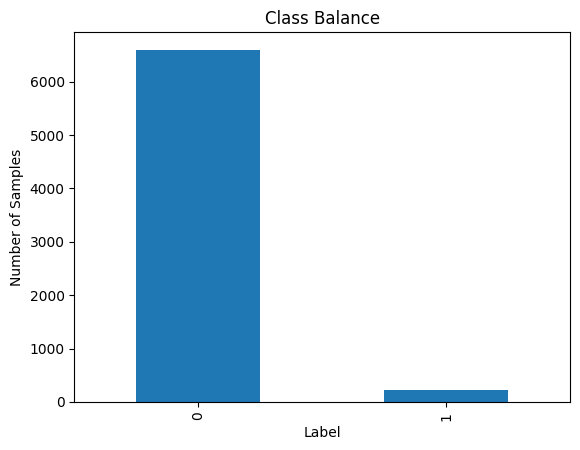

In [49]:
#plotting the distribution of labels:
df['Bankrupt?'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.title('Class Balance')

In [50]:
len(df[df['Bankrupt?']==0])

6599

In [51]:
len(df[df['Bankrupt?']==1])

220

Heatmap Analysis on Coloumns

<Axes: >

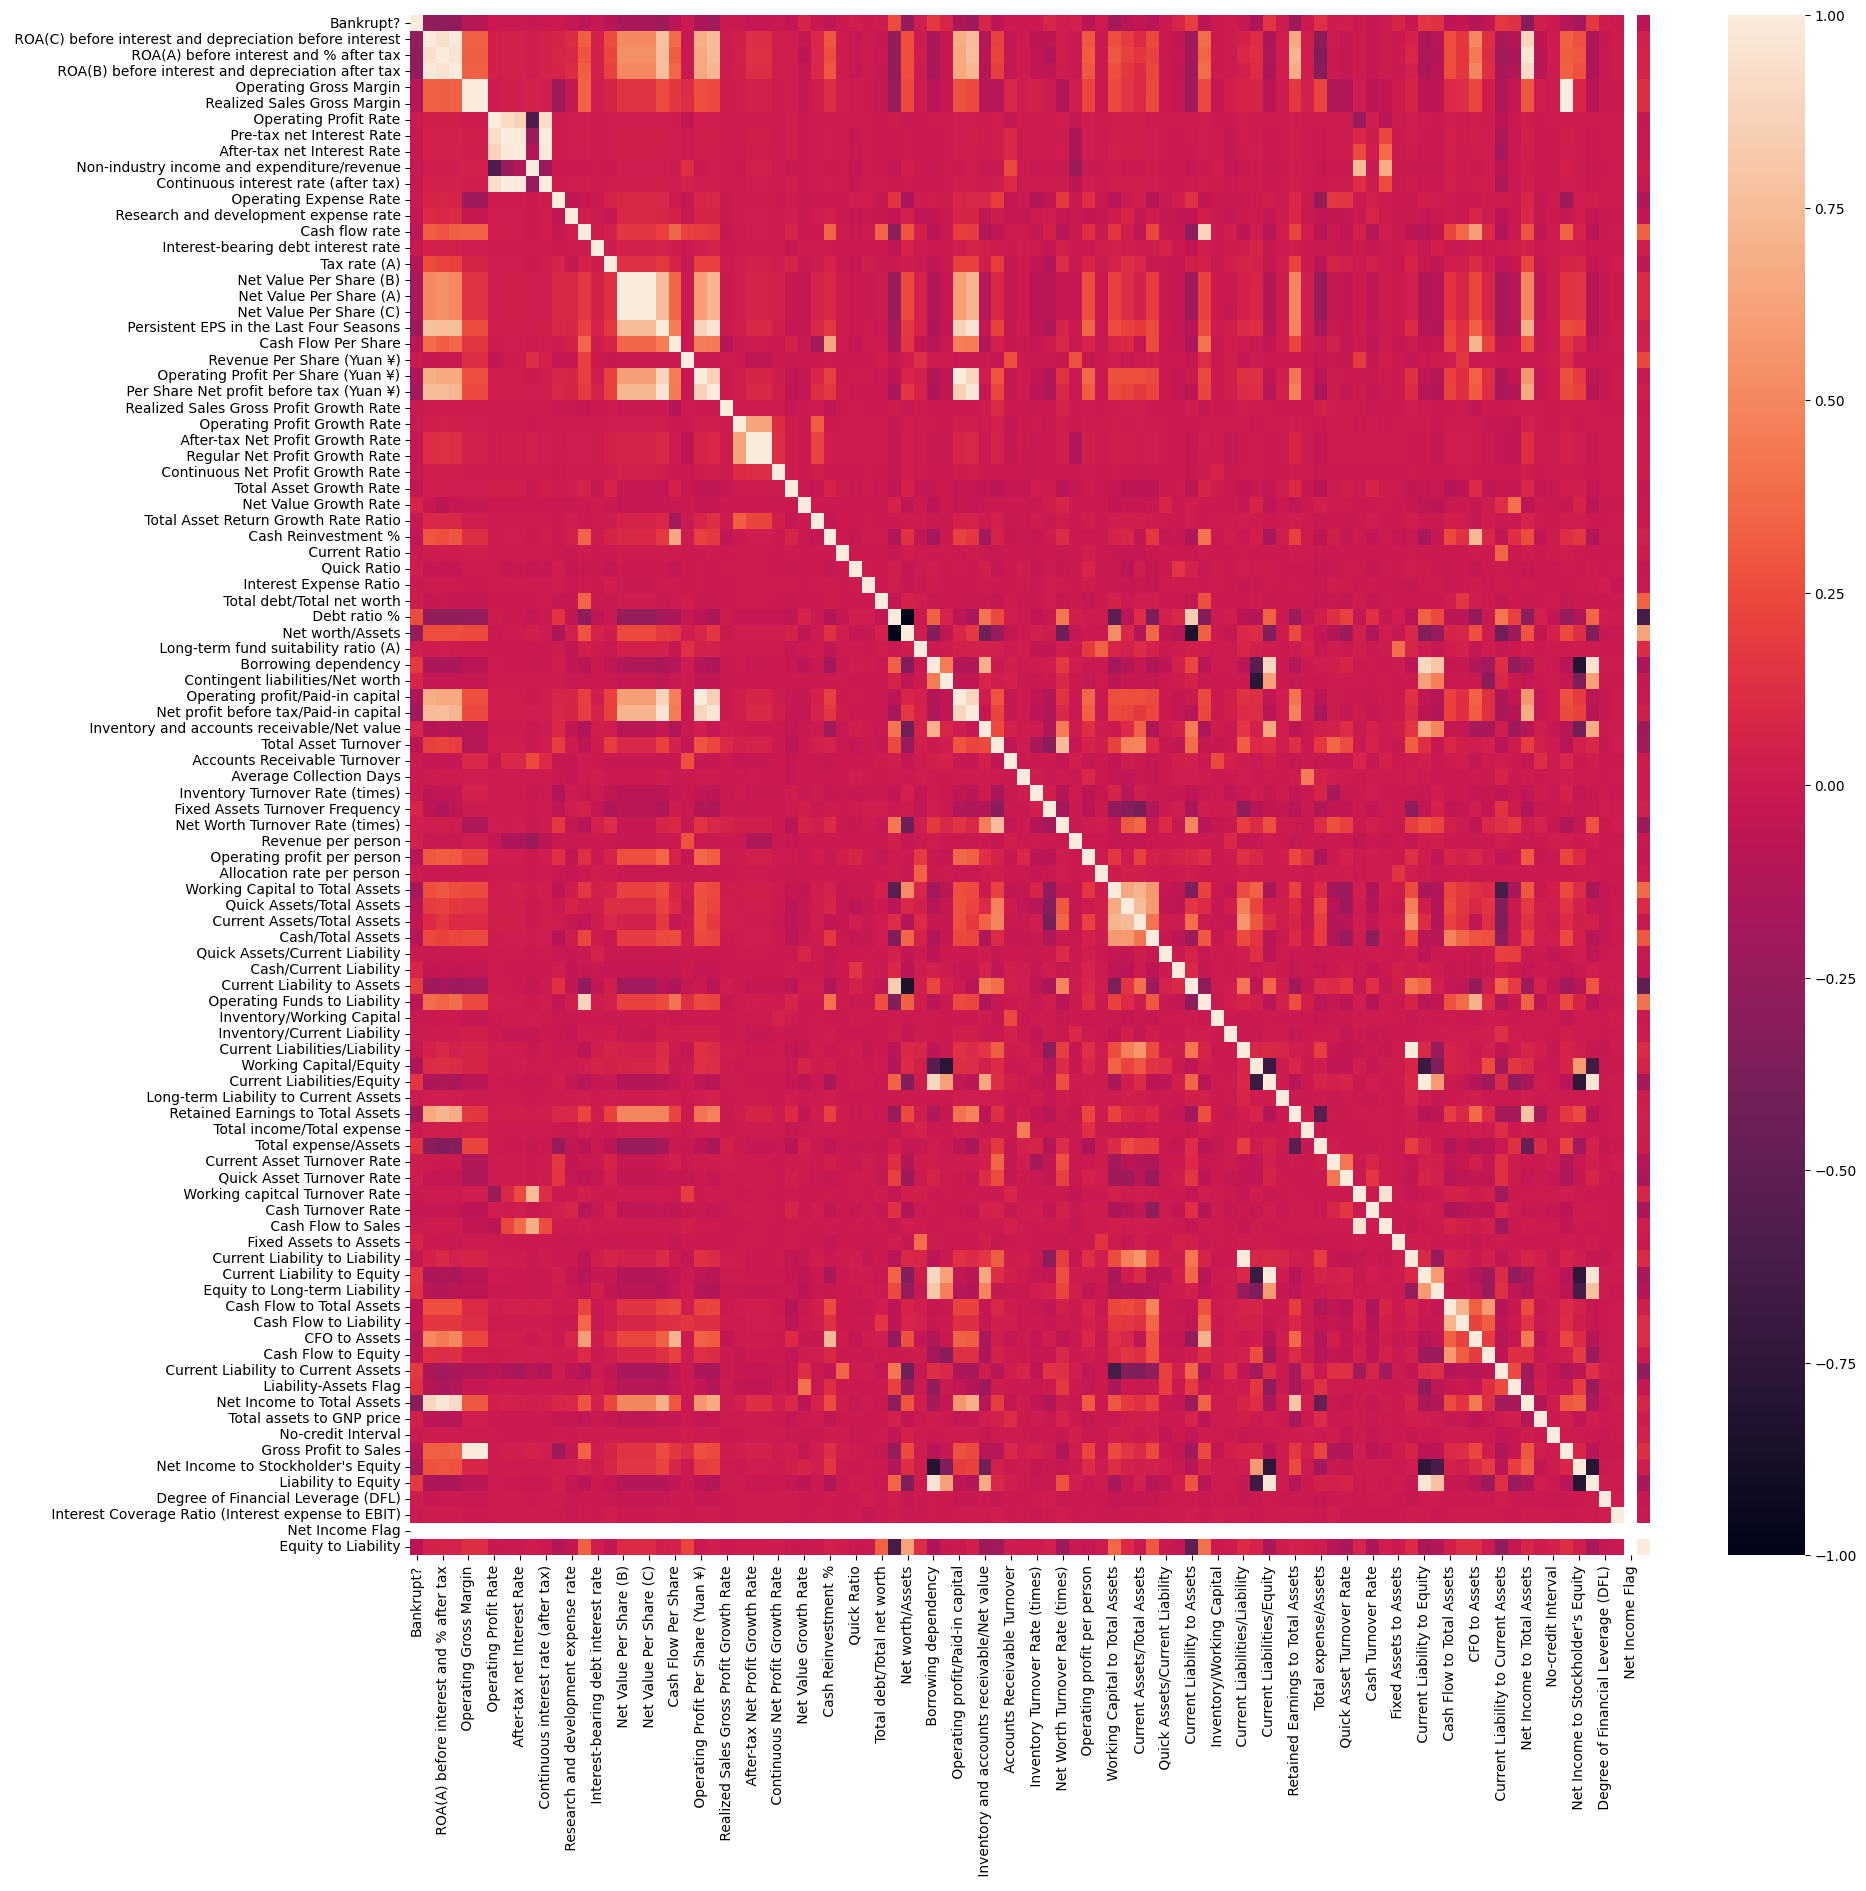

In [52]:
#plotting the correlation matrix as a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

Observations:
All three ROAs (ROA(a), ROA(b) and ROA(c)) are positively correlated amongst each other.
Net value per share A,B and C are also highly correlated between each other.
' Debt ratio %', ' Net worth/Assets' are negatively correlated.
After tax net interest rate and pre tax net interets rate are also highely correlated.
' Non-industry income and expenditure/revenue' is negatively correlated with Operating Profit Rate.
' Operating Profit Growth Rate',' After-tax Net Profit Growth Rate' and ' Regular Net Profit Growth Rate' are also highely correlated.
' Per Share Net profit before tax (Yuan ¥)' and ' Persistent EPS in the Last Four Seasons' are highely correlated.
Similarly there are a lot of multicollinearity in the dataset. So it can be concluded from here that Regression model will not work properly on this dataset.

In [53]:
#checking for Null values in all the columns:
for col in df.columns.values:
    print(f"{col} : {len(df[df[col].isnull()==True])}")

Bankrupt? : 0
 ROA(C) before interest and depreciation before interest : 0
 ROA(A) before interest and % after tax : 0
 ROA(B) before interest and depreciation after tax : 0
 Operating Gross Margin : 0
 Realized Sales Gross Margin : 0
 Operating Profit Rate : 0
 Pre-tax net Interest Rate : 0
 After-tax net Interest Rate : 0
 Non-industry income and expenditure/revenue : 0
 Continuous interest rate (after tax) : 0
 Operating Expense Rate : 0
 Research and development expense rate : 0
 Cash flow rate : 0
 Interest-bearing debt interest rate : 0
 Tax rate (A) : 0
 Net Value Per Share (B) : 0
 Net Value Per Share (A) : 0
 Net Value Per Share (C) : 0
 Persistent EPS in the Last Four Seasons : 0
 Cash Flow Per Share : 0
 Revenue Per Share (Yuan ¥) : 0
 Operating Profit Per Share (Yuan ¥) : 0
 Per Share Net profit before tax (Yuan ¥) : 0
 Realized Sales Gross Profit Growth Rate : 0
 Operating Profit Growth Rate : 0
 After-tax Net Profit Growth Rate : 0
 Regular Net Profit Growth Rate : 0
 Con

Observations:
There are no null values in the data.

Exploratory Data Analysis

ROA

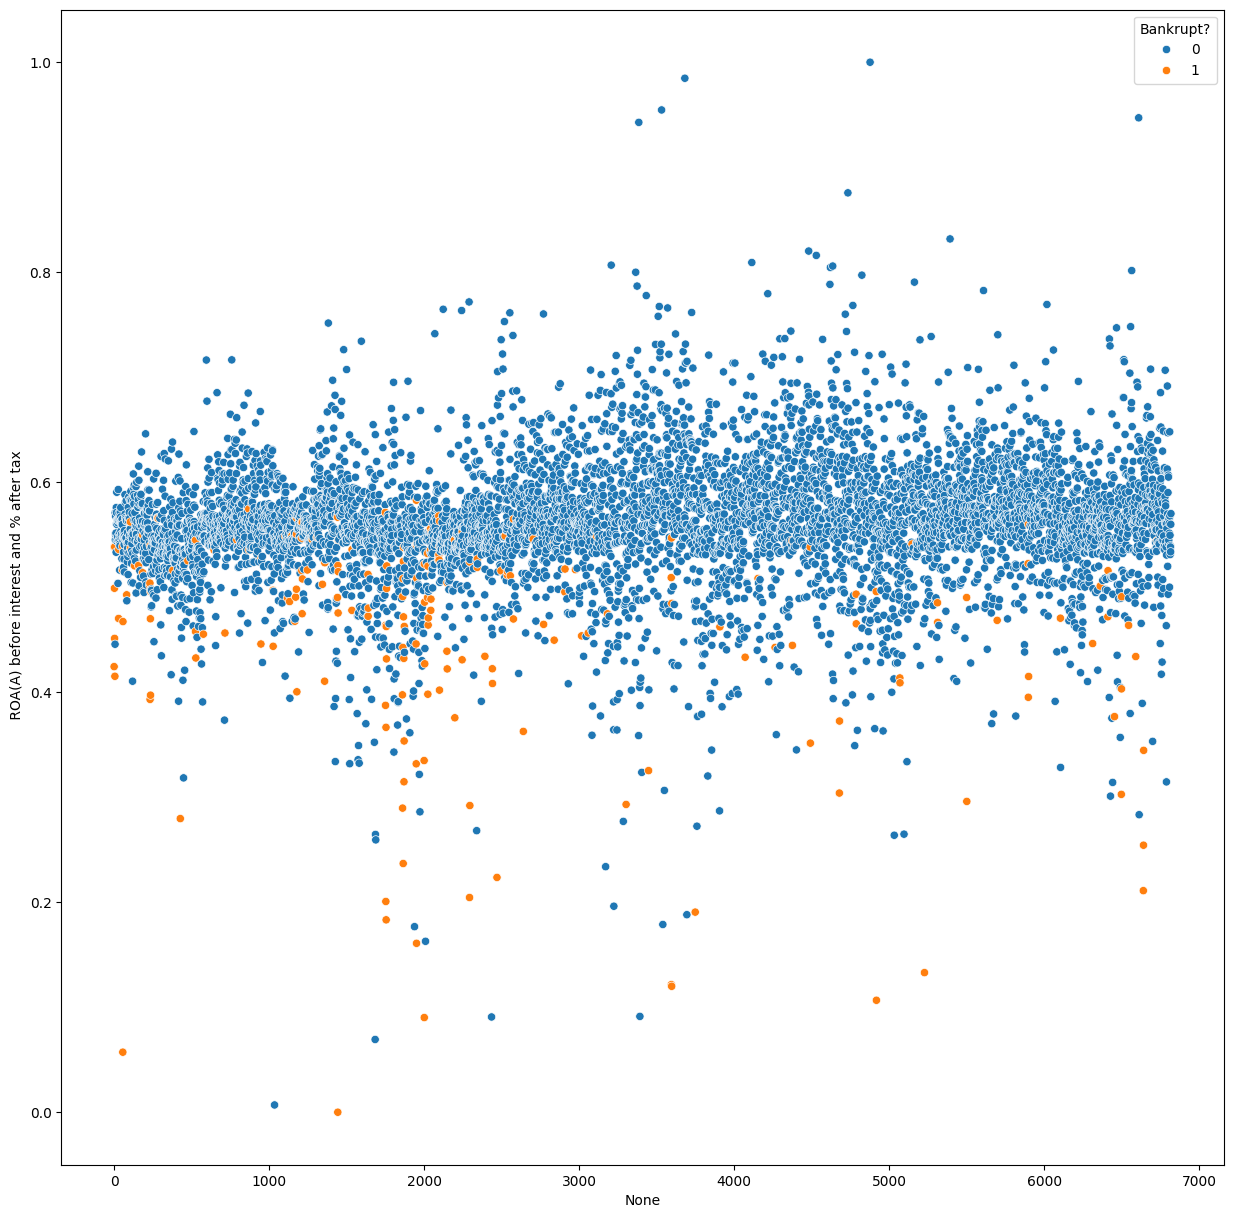

In [54]:
#plotting all the ROA(A) before interest and %after tax samples as scatter plot
fig = plt.figure(figsize = (15,15))
sns.scatterplot(x = df.index ,y = ' ROA(A) before interest and % after tax', hue = 'Bankrupt?', data = df)
plt.show()

Cashflow Rate

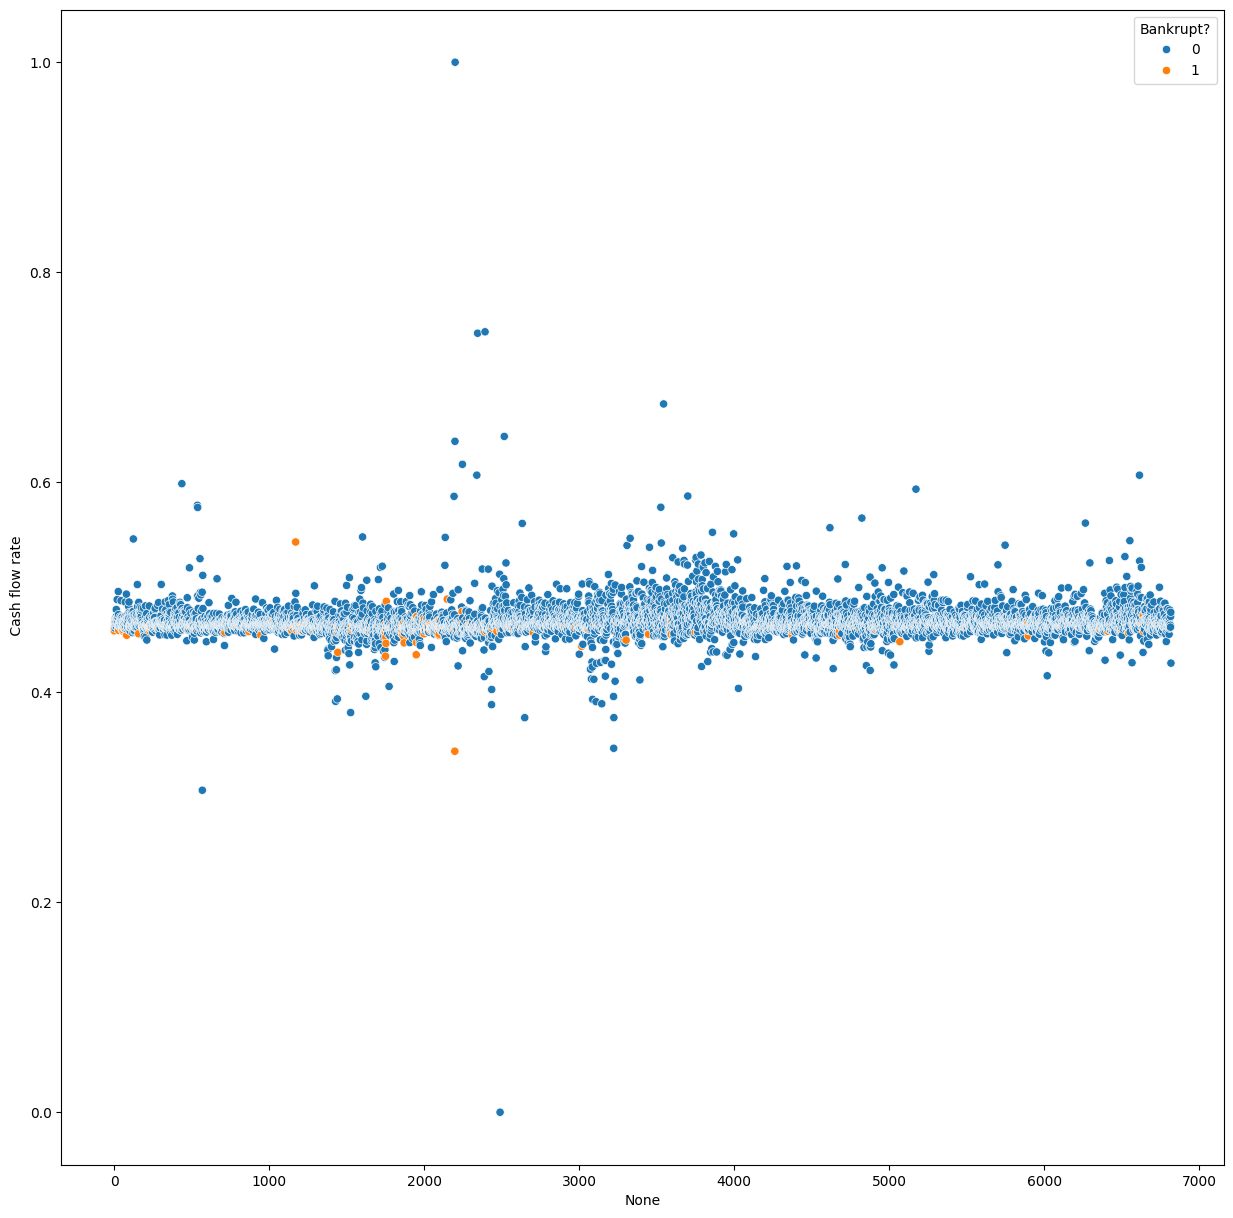

In [55]:
#plotting all the Cash flow rate samples as scatter plot
fig = plt.figure(figsize = (15,15))
sns.scatterplot(x=df.index, y = ' Cash flow rate', hue='Bankrupt?', data=df)
plt.show()

Debt Ratio

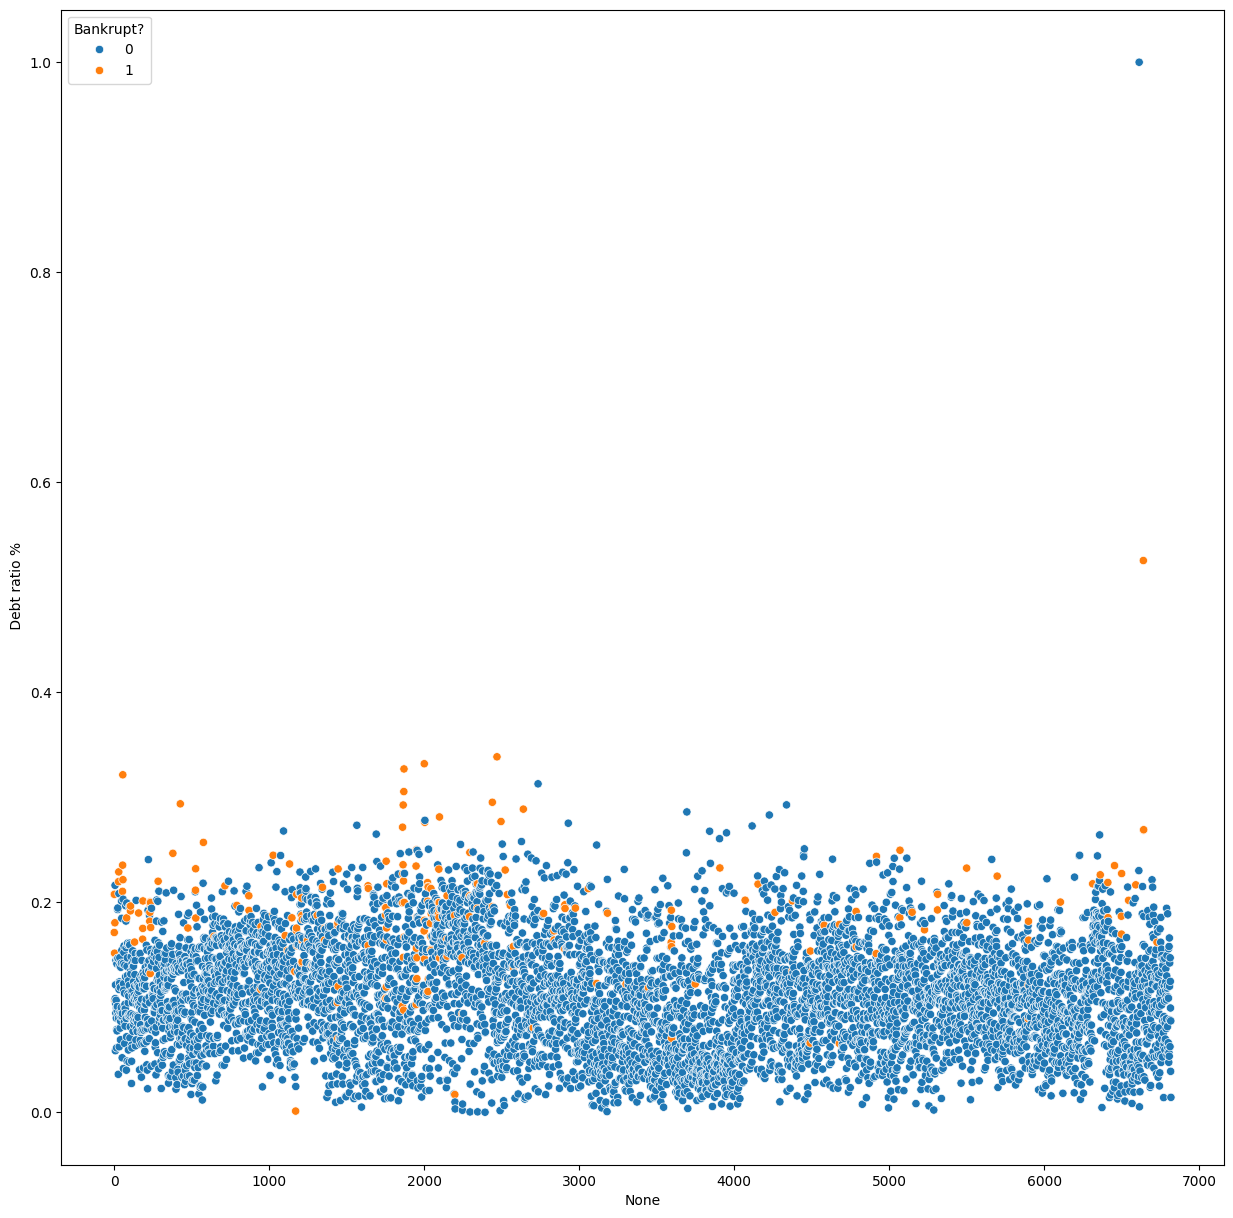

In [56]:
 #plotting all the Debt ratio % samples as scatter plot
plt.figure(figsize=(15,15))
sns.scatterplot(x=df.index , y=' Debt ratio %', hue = 'Bankrupt?', data=df)
plt.show()

Higher values of Debt ratio have more tendency to lead to bankruptcy.

Net Income to Total Assets

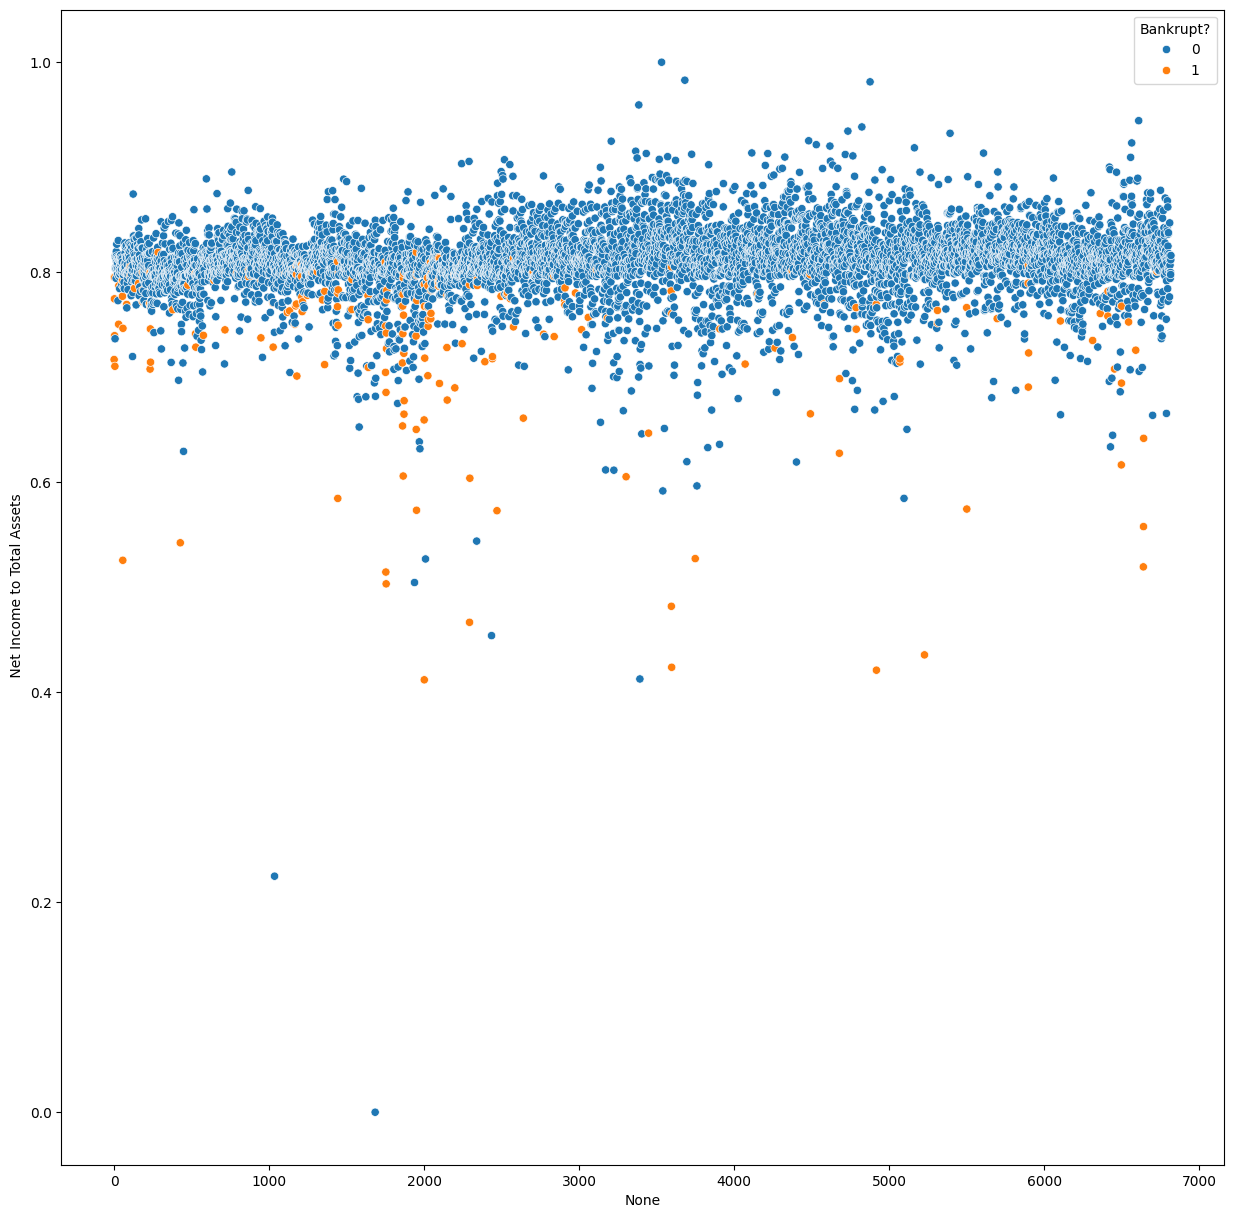

In [57]:
#plotting all the Net Income to Total Assets samples as scatter plot
plt.figure(figsize=(15,15))
sns.scatterplot(x=df.index , y=' Net Income to Total Assets', hue = 'Bankrupt?', data=df)
plt.show()

Lower values of net income to Total assets have more tendency to lead to bankruptcy.

Plans ahead:
1. Perform dimensionality reduction using PCA : Since it is a very high dimensional data, we need to apply dimensionality reduction technique to only use important features.
2. Upsampling the data: Since it is a highly imbalanced dataset, we will try to upsample the dataset using SMOTE.
3. Drop the populated class instances and make it balanced.

In [58]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score,roc_auc_score
from sklearn.svm import SVC
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Preprocessing

In [80]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Split df into X and y
    X = df.drop('Bankrupt?', axis=1)
    y = df['Bankrupt?']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [81]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [82]:
y_train

3392    0
2755    0
4442    0
4267    0
4912    0
       ..
905     0
5192    0
3980    0
235     1
5157    0
Name: Bankrupt?, Length: 4773, dtype: int64

Training Original Data

In [83]:
original_models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in original_models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

c:\Users\pahwa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.


c:\Users\pahwa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\pahwa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.


c:\Users\pahwa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


1. Principal Component Analysis(PCA)

Best value of n_component for 99% variance : 11
Best value of n_component for 95% variance : 8
Best value of n_component for 90% variance : 7


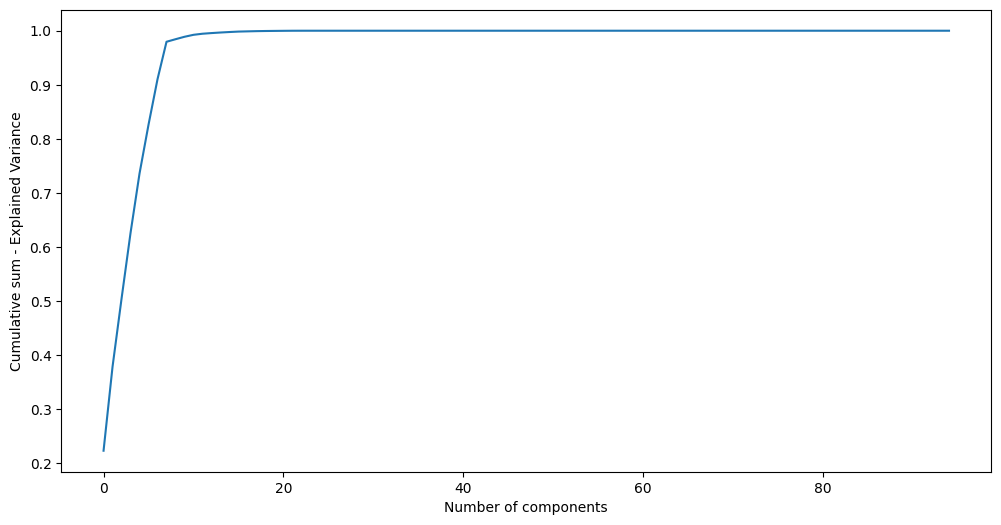

In [59]:
#extract X and y from our dataset by dropping and column indexing
X = df.drop('Bankrupt?', axis = 1)
y = df['Bankrupt?']

#defining PCA 
pca = PCA().fit(X)

plt.figure(figsize = (12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative sum - Explained Variance')

#fitting PCA on our X
pca = PCA(n_components=0.99).fit(X)
print(f'Best value of n_component for 99% variance : {pca.n_components_}')

pca = PCA(n_components=0.95).fit(X)
print(f'Best value of n_component for 95% variance : {pca.n_components_}')

pca = PCA(n_components=0.90).fit(X)
print(f'Best value of n_component for 90% variance : {pca.n_components_}')

Since it is a very high dimensional data, we need to apply dimensionality reduction technique to only use important features.

It can be clearly interpreted from this curve that only 11 features accounts for 99% of the variance in data. In other words we can also say that 99% of the information present in data can be obtained by using merely those top 11 features instead of 95 features.

So we will transform the data using PCA.

In [86]:
X_pca = PCA(11).fit_transform(X) 


2. Dealing with imbalancy

2.1 SMOTE

In [61]:
X_pca.shape

(6819, 11)

In [62]:
#transforming the data with SMOTE:

X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.25, random_state=42 )
print("Before Undersampling: ")
print(f"                       Bankrupt 1 = {sum(y_train==1)}")
print(f"                       Bankrupt 0 = {sum(y_train==0)}")
print("========="*6)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After Undersampling: ")
print(f"                       Bankrupt 1 = {sum(y_train_smote==1)}")
print(f"                       Bankrupt 0 = {sum(y_train_smote==0)}")

Before Undersampling: 
                       Bankrupt 1 = 162
                       Bankrupt 0 = 4952
After Undersampling: 
                       Bankrupt 1 = 4952
                       Bankrupt 0 = 4952


Confusion Matrix

In [63]:
def plot_consufion_matrix(cm, classes, title = 'Confusion Matrix', normalize = False,cmap = plt.cm.Blues ):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        plt.imshow(cm,interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=0)
        plt.yticks(tick_marks, classes)
        plt.tight_layout()
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        for i in range(len(cm)):
            for j in range(len(cm[0])):
                plt.text(j,i,cm[i][j], color = 'red', size = 'xx-large', ha = 'center',weight='extra bold')
def print_evaluation_report(y_test, y_pred, y_pred_proba):
    cm = confusion_matrix(y_test, y_pred)
    #np.set_printoptions(precision=2)
    #print(cm)
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    print('F1 Score : %.2f' % f1)
    print('AUC ROC : %.2f' % auc)
    print('Precision : %.2f' % precision)
    classes = [0,1]
    plt.figure()
    plot_consufion_matrix(cm, classes,title = 'Confusion Matrix', normalize = False)
    plt.show()
    return
    

Training the Reduced Data

In [89]:
reduced_models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in reduced_models.items():
    model.fit(X_train_smote, y_train_smote)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.


c:\Users\pahwa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\pahwa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [90]:
reduced_results = []

for name, model in reduced_models.items():
    result = model.score(X_train_smote, y_train_smote)
    reduced_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                   Logistic Regression: 64.60%
                   K-Nearest Neighbors: 93.99%
                         Decision Tree: 100.00%
Support Vector Machine (Linear Kernel): 47.80%
   Support Vector Machine (RBF Kernel): 85.98%
                        Neural Network: 89.75%
                         Random Forest: 100.00%
                     Gradient Boosting: 85.71%


Based on the results obtained, it can be concluded that:
1. Decision Tree and Random Forest has the best performance with an accuracy of 100%.

2. The other models such as K-Nearest Neighbors, Support Vector Machine (RBF kernel), and Neural Network also perform well with an accuracy of 93.99%,85.98% and 89.75% respectively.

3. The Gradient Boosting and Logistic Regression models also have similar performance with an accuracy of 85.71% and 64.60%, respectively.

4. The Support Vector Machine (Linear Kernel): 47.80% performs comparatively poorly with an accuracy of 47.80%.

